# Toería de Redes Neuronales

Hoy en día segurmante nos hemos encontrado con la expresión "deep learning" o «aprendizaje profundo». Se refiere a un conjunto de herramientas que se han hecho muy populares en una amplia gama de campos de aplicación, desde el reconocimiento de imágenes, el reconocimiento del habla y el procesamiento del lenguaje natural hasta la publicidad dirigida y el descubrimiento de fármacos. El campo ha crecido hasta el punto de que existen sofisticados paquetes de software de dominio público, muchos de ellos producidos por empresas tecnológicas de alto nivel.

## Red Neuronal

Para una entrada $x$ con una etiqueta $y$, queremos minimizar la pérdida entre la predicción $predict(w;x)$ y la etiqueta $y$. La función $predict$ tiene dos parámetros: $w$ son los "pesos" mientras que $x$ el dato de entrada. Teniendo $N$ muestras, el problema de minimización es el siguiente

$$
\operatorname{min}_w\qquad \frac1N\sum_{i=1}^N \operatorname{loss}(y_i, \operatorname{predict}(w;x_i)).
$$

## Capas (Layers)

La entrada $x$ entra en las primeras capas, la salida de la primera capa va a la segunda capa y así sucesivamente. Matemáticamente hablando, una red con $L$ capas tiene la estructura

$$
\hat y = \operatorname{predict}(w;x) = (f_L \circ \dots \circ f_1)(x),
$$

donde $f_1,...,f_L$ son capas individuales. La mayoría de estas capas dependen de los pesos $W$. Por otro lado, sólo la primera capa $f_1$ depende directamente de la entrada $x$. Dado que dos capas que no están una al lado de la otra (como la primera y la tercera) no están conectadas directamente, esto permite la propagación sencilla de los valores de las funciones y sus derivadas.

Para fijar ideas, supongamos que la red tiene $L$ capas, con las capas $1$ y $L$ siendo respectivamente las capas de entrada y salida. Supongamos que la capa $l$, para $ (l = 1, 2, 3, \dots, L$, contiene  $n_l$ neuronas. Así, $n_1$ es la dimensión de los datos de entrada. En general, la red mapea desde $\mathbb{R}^{n_1}$ a $\mathbb{R}^{n_L}$. 
Usamos $W^{[l]} \in \mathbb{R}^{n_l \times n_{l-1}}$ para denotar la matriz de pesos en la capa $l$. Más precisamente, $w_{jk}^{[l]}$ es el peso que la neurona $j$ en la capa $l$ aplica a la salida de la neurona $k$ en la capa $l-1$.  Similarmente,  $b^{[l]} \in \mathbb{R}^{n_l}$ es el vector de sesgos para la capa $l$, así que la neurona $j$ en la capa $l$ usa el sesgo $b_j^{[l]}$.

En la Figura se ve un ejemplo con $L = 5$ capas. Aquí, $n_1 = 4$, $n_2 = 3$, $n_3 = 4$, $n_4 = 5$, y $n_5 = 2$, 
así que 
$W^{[2]} \in \mathbb{R}^{3 \times 4}, \quad W^{[3]} \in \mathbb{R}^{4 \times 3}, \quad W^{[4]} \in \mathbb{R}^{5 \times 4}, \quad W^{[5]} \in \mathbb{R}^{2 \times 5}, \quad b^{[2]} \in \mathbb{R}^3, \quad b^{[3]} \in \mathbb{R}^4, \quad b^{[4]} \in \mathbb{R}^5, \quad b^{[5]} \in \mathbb{R}^2.$

![](nn.png)

Dado un input $x \in \mathbb{R}^{n_1}$, podemos resumir la acción de la red dejando que $a_j^{[l]}$ denote la salida, o *activación*, de la neurona $j$ en la capa $l$. Así, tenemos:

$$
a^{[1]} = x \in \mathbb{R}^{n_1},
$$
$$
a^{[l]} = \sigma\left(W^{[l]} a^{[l-1]} + b^{[l]}\right) \in \mathbb{R}^{n_l}, \quad \text{para } l = 2, 3, \dots, L.
$$

Supongamos ahora que tenemos $N$ conjunto de datos, o *puntos de entrenamiento*, en $\mathbb{R}^{n_1}$, $\{x^{\{i\}}\}_{i=1}^N$, 
para los cuales hay salidas objetivo dadas $\{y(x^{\{i\}})\}_{i=1}^N$ en $\mathbb{R}^{n_L}$. 
Luego la función de costo o pérdida que queremos minimizar tiene la forma:

$$
Cost = \frac{1}{N} \sum_{i=1}^N loss(y(x^{\{i\}}), a^{[L]}(x^{\{i\}})),
$$


#### Funciones de activación

La función de activación suele escribirse como $\sigma :\mathbb{R}\to\mathbb{R}$ y su operación sobre el vector $W^{[l]} a^{[l-1]} + b^{[l]}$ se entiende en sentido componente. Ejemplos de funciones de activación son:

```math
\begin{aligned}
&\text{Sigmoid:}&\sigma(z) &= \frac{1}{1+e^{-z}} ,\\
&\text{ReLU:}&\sigma(z) &= \operatorname{max}\{0,z\}, \\
&\text{Softplus:}&\sigma(z) &= \log(1+e^z), \\
&\text{Swish:}&\sigma(z) &= \frac{z}{1+e^{-z}} ,\\
\end{aligned}
```

![](Activation.svg)

#### Softmax layer

La función de pérdida de entropía cruzada requiere que su entrada sea una distribución de probabilidad. Para ello, la capa softmax se aplica directamente antes de la función de pérdida. Su formulación es la siguiente

$$
\operatorname{softmax}(a_1,\dots,a_K) = \frac{1}{\sum_{k=1}^K e^{a_k}}(e^{a_1}, \dots, e^{a_K}).
$$

La exponencial garantiza que todas las salidas sean positivas. La normalización asegura que la suma de las salidas es uno. Por lo tanto, se trata de una distribución de probabilidad. Cuando una capa densa precede a la capa softmax, se utiliza sin ninguna función de activación (ya que, por ejemplo, ReLU haría que muchas probabilidades fueran iguales).

## Funciones de pérdida

The most commonly used loss functions are:
- (Mean) squared error
  ```math
  \operatorname{loss}(y,\hat y) = (y-\hat y)^2.
  ```
- Cross-entropy
  ```math
  \operatorname{loss}(y,\hat y) = - \sum_{k=1}^K y_k\log \hat y_k.
  ```
- Binary cross-entropy
  ```math
  \operatorname{loss}(y,\hat y) = - y\log \hat y - (1-y)\log(1- \hat y).
  ```

El error cuadrático medio se suele utilizar para problemas de regresión, mientras que ambas entropías cruzadas para problemas de clasificación. El primero para problemas multiclase ($K>2$) y el segundo para problemas binarios ($K=2$).

#### Ejemplo: Red "Fábrica de cócteles"

![](coctel_red_neuronal.png)

**Referencia:** *O. Cailin, Deep learning architectures - a mathematical approach, Springer Series in the Data Sciences, 2020*

---

### Comencemos...

In [ ]:
using LinearAlgebra, RDatasets, Random, Statistics, ForwardDiff, Plots

### Inicializamos los Datos: Iris

El conjunto de datos Iris contiene mediciones de 150 flores de iris de tres especies diferentes: setosa, versicolor, virginica. Cada muestra incluye la **longitud y el ancho del sépalo**, y **la longitud y el ancho del pétalo**, todas medidas en centímetros. Es ampliamente utilizado en aprendizaje automático para tareas de clasificación y demostraciones educativas.

In [18]:
iris = dataset("datasets", "iris")
X = Matrix(iris[:, 1:4])
y = iris.Species

150-element CategoricalArrays.CategoricalArray{String,1,UInt8}:
 "setosa"
 "setosa"
 "setosa"
 "setosa"
 "setosa"
 "setosa"
 "setosa"
 "setosa"
 "setosa"
 "setosa"
 ⋮
 "virginica"
 "virginica"
 "virginica"
 "virginica"
 "virginica"
 "virginica"
 "virginica"
 "virginica"
 "virginica"

In [19]:
iris

Row,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
,Float64,Float64,Float64,Float64,Cat…
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa
7,4.6,3.4,1.4,0.3,setosa
8,5.0,3.4,1.5,0.2,setosa
9,4.4,2.9,1.4,0.2,setosa


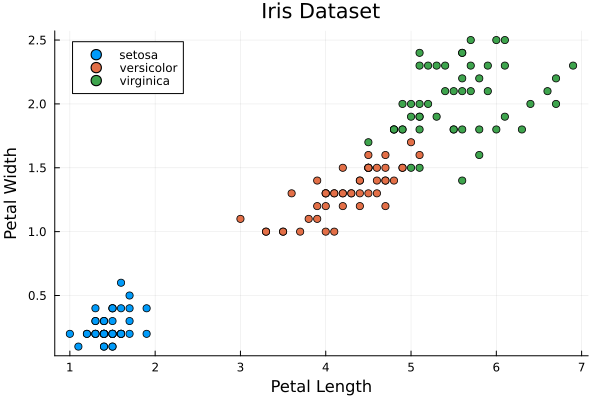

In [21]:
scatter(iris.PetalLength, iris.PetalWidth, group=iris.Species, xlabel="Petal Length", ylabel="Petal Width",
        title="Iris Dataset", legend=:topleft)

### Dividir los Datos:

A nuestros datos los vamos a dividir en 2: 
- Entrenamiento: ($X_{train}$, $y_{train}$)
- Testeo: ($X_{test}$, $y_{test}$)

1. Vamos a calcular $w^* = argmin_w l(y_{train},\hat{y}(X_{train},w))$
2. Usaremos $w^*$ para **evaluar** $l(y_{test},\hat{y}(X_{test}, w^*))$ y así evaluar si el modelo funciona con datos con los que no fue entrenado.

In [22]:
function split(X, y; dims=1, ratio_train=0.8)
    n = length(y)
	
    n_train = round(Int, ratio_train*n) #Redondeamos el corte
    i_rand = randperm(n)				# Permutamos los indices
    i_train = i_rand[1:n_train] 		# Usamos el 80% para train
    i_test = i_rand[n_train+1:end] 		# El resto lo usamos para test

	Xₜᵣₐᵢₙ = X[i_train,:]
	yₜᵣₐᵢₙ = y[i_train]
	Xₜₑₛₜ  = X[i_test, :]
	yₜₑₛₜ = y[i_test]
    return Xₜᵣₐᵢₙ, yₜᵣₐᵢₙ, Xₜₑₛₜ, yₜₑₛₜ

end

Xₜᵣₐᵢₙ, yₜᵣₐᵢₙ, Xₜₑₛₜ, yₜₑₛₜ = split(X, y)
#length(y) ==  length(yₜₑₛₜ) + length(yₜᵣₐᵢₙ)

([6.4 2.8 5.6 2.1; 6.7 3.0 5.2 2.3; … ; 4.7 3.2 1.3 0.2; 7.7 2.6 6.9 2.3], CategoricalArrays.CategoricalValue{String, UInt8}["virginica", "virginica", "setosa", "versicolor", "versicolor", "setosa", "virginica", "virginica", "versicolor", "virginica"  …  "virginica", "setosa", "setosa", "versicolor", "virginica", "versicolor", "setosa", "setosa", "setosa", "virginica"], [5.1 3.7 1.5 0.4; 6.4 2.7 5.3 1.9; … ; 4.5 2.3 1.3 0.3; 5.7 2.8 4.1 1.3], CategoricalArrays.CategoricalValue{String, UInt8}["setosa", "virginica", "virginica", "versicolor", "virginica", "virginica", "virginica", "setosa", "virginica", "setosa"  …  "virginica", "setosa", "virginica", "virginica", "versicolor", "virginica", "setosa", "virginica", "setosa", "versicolor"])

### Normalizar los Datos

Antes de utilizar algun modelo de optimización, debemos **normalizar** nuestros datos. 
No normalizar los datos puede generar los siguientes problemas:
1. **Convergencia lenta**: Los algoritmos de optimización, como el descenso de gradiente, pueden tardar más en converger si las características tienen escalas muy diferentes. 

2. **Dominio de variables**: Las variables con valores más grandes pueden dominar el proceso de aprendizaje, lo que significa que el modelo puede **sesgarse** hacia estas características y no tener en cuenta adecuadamente las características con valores más pequeños.

3. **Problemas numéricos**: Las diferencias extremas en la escala de las características pueden conducir a problemas numéricos, lo que puede afectar la precisión de los cálculos.

**CUIDADO!** 
- Los coeficientes de normalizacion deben ser **calculados solo con los datos de entrenamiento**. Si en el proceso de calcular los coeficientes se utilizan los datos de testeo se estarian filtrando informacion de los datos de testeo en el proceso de entrenamiento (**Data Leakage**)

- El conjunto de datos $y$ en nuestro ejemplo es categorico, por lo tanto **no hay que normalizarlo** porque no representa un valor numerico.

In [23]:
function normalize(X_train, X_test; dims=1)
    col_mean = mean(X_train; dims)
    col_std = std(X_train; dims)

    return (X_train .- col_mean) ./ col_std, (X_test .- col_mean) ./ col_std
end

normalize (generic function with 1 method)

### One-Hot Encoding 🔥

El one-hot encoding convierte etiquetas categóricas en vectores binarios. Por ejemplo, en el conjunto de datos Iris, las especies "setosa", "versicolor" y "virginica" se podrían representar como [1, 0, 0], [0, 1, 0] y [0, 0, 1], respectivamente.

In [24]:
function onehot(y, classes)
	y_onehot = zeros(length(classes), length(y))
	num_of_class = 1:length(classes)
	
	for i in 1:length(y)
		y_onehot[:,i] = y[i].==classes
	end
	return y_onehot
end

y_oh = onehot(y, unique(y))

3×150 Matrix{Float64}:
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     1.0  1.0  1.0  1.0  1.0  1.0  1.0

Unifiquemos todo...

In [25]:
function prepare_data(X, y; do_normal=true, do_onehot=true, kwargs...)
    X_train, y_train, X_test, y_test = split(X, y)

    if do_normal
        X_train, X_test = normalize(X_train, X_test; kwargs...)
    end

    classes = unique(y)

    if do_onehot
        y_train = onehot(y_train, classes)
        y_test = onehot(y_test, classes)
    end

    return X_train, y_train, X_test, y_test, classes
end

Random.seed!(15)
X_train, y_train, X_test, y_test, classes = prepare_data(X, y)

([2.109296904829797 -0.12066351419655945 1.5985845679002726 1.155805799088884; 1.7429935349606571 -0.35803436179635106 1.4276637349795427 0.7632679805303948; … ; -1.0653323007027478 0.8288198762026059 -1.2500959807785628 -1.0685751727425536; 1.8650946582503711 -0.5954052093961426 1.3137165130323891 0.894113920049891], [0.0 0.0 … 1.0 0.0; 0.0 0.0 … 0.0 0.0; 1.0 1.0 … 0.0 1.0], [-1.5537367938616014 0.8288198762026059 -1.3640432027257163 -1.19942111226205; -0.8211300541233211 -0.8327760569959332 0.06029707161370158 0.23988422245240937; … ; -1.5537367938616014 1.303561571402189 -1.591937646620023 -1.3302670517815465; -0.943231177413035 1.7783032666017713 -1.3070695917521395 -1.19942111226205], [1.0 0.0 … 1.0 1.0; 0.0 1.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0], ["setosa", "versicolor", "virginica"])

### Creemos la Red

Ahora construiremos una red neuronal simple, RedSimple, con las siguientes tres capas:

- La primera capa es una capa densa con la función de activación ReLU.
- La segunda capa es una capa densa con la función de activación identidad.
- La tercera capa es la softmax.
Sus parámetros se almacenarán en la siguiente estructura.

In [26]:
struct RedSimple{T<:Real}
    W1::Matrix{T}
    b1::Vector{T}
    W2::Matrix{T}
    b2::Vector{T}
end

In [27]:
Random.seed!(16)

W1 = randn(5, size(X_train,2))	
b1 = randn(5)
W2 = randn(size(y_train,1), 5)
b2 = randn(size(y_train,1))

model = RedSimple(W1,b1,W2,b2)

RedSimple{Float64}([-0.9454586284478577 1.3756038336772116 -0.7699323300143605 1.7081739369853812; 1.0005781369095725 -0.8016047122678335 -0.5168701213951724 -0.4665581061569879; … ; -0.43346768878009484 1.460393899181731 -0.3015237534589358 -1.18526311885263; -2.4176752554924295 -0.5692877514038688 -1.3245502930612199 -0.20537388984413024], [-0.02631340000911748, -1.1653780231253965, 0.5615578849680716, -0.11344273744399909, 0.6950657606464364], [-0.5373842456160057 0.47806682272082307 … -1.04951598316768 -0.8142776146251888; 1.2141589980970713 0.42466807918831506 … 0.9623508667605871 1.360816840362407; -1.0445553917100379 -0.5674735932609069 … -1.1568880914509978 -1.35439099580807], [-1.6090959259543203, -0.009250846348216945, -0.32756888232036663])

In [57]:
function foward_pass(modelo,x) # Este es ejercicio para la clase
    z1 = modelo.W1*x .+ modelo.b1
    a1 = max.(z1, 0)
    z2 = modelo.W2*a1 .+ modelo.b2
    return exp.(z2) ./ sum(exp.(z2), dims=1)
end

foward_pass (generic function with 1 method)

In [29]:
loss(y,y_hat; ϵ=1e-10) = -sum(y .* log.(y_hat .+ ϵ))

loss (generic function with 1 method)

### Gradiente

Un requisito previo para el "entrenamiento" de redes neuronales es el cálculo eficiente de las derivadas. Aunque parezca complicado, no es más que una simple aplicación de la regla de la cadena. Consiste en pasos hacia delante (*forward pass*) y pasos hacia atrás (*backward pass*). El paso hacia adelante comienza con la entrada, calcula los valores en cada neurona y termina evaluando la función de pérdida. El paso hacia atrás comienza con la función de pérdida, calcula las derivadas parciales hacia atrás y las encadena para obtener la derivada compuesta. 

A este método se lo conoce como *back propagation*.

```math
    L(w) := \sum_{i=1}^n \operatorname{loss}(y_i, f(w;x_i)).
```

 ```math
    \nabla L(w) = \sum_{i=1}^n \operatorname{loss}'(y_i, f(w;x_i))\nabla_w f(w;x_i).
```

 ```math
    \begin{aligned}
    z_l &= W_la_{l-1} + b_l, \\
    a_l &= \sigma_l(z_l)
    \end{aligned}
```

```math
    \begin{aligned}
    \nabla_{W_l} f &= \nabla_{W_l}a_L = \nabla_{z_L}a_M\nabla_{z_{L-1}}a_L\nabla_{a_{L-1}}z_{L-1}\dots \nabla_{z_l}a_l\nabla_{W_l}z_l, \\
    \nabla_{b_l} f &= \nabla_{b_l}a_L = \nabla_{z_L}a_L\nabla_{z_{L-1}}a_L\nabla_{a_{L-1}}z_{L-1}\dots \nabla_{z_l}a_l\nabla_{b_l}z_l.
    \end{aligned}
```

 ```math
    \begin{aligned}
    \nabla_{a_{l-1}} z_l &= W_l, \\
    \nabla_{z_l} a_l &= \operatorname{diag}(\sigma_l'(z_l)).
    \end{aligned}
```

#### A trabajar...

1. Implementar una función que calcule el gradiente para cada dato individual $(x,y)$
2. Implementar la funcion `grad` que calcula los gradientes y compute el valor de la función de pérdida.  
3. Implementar una función que realice el método de descenso por el gradiente con un paso constante y un número máximo de iteraciones. Debe tomar como parametros el "modelo" y los conjuntos de entrenamiento.